In [1]:
from utils.model_utils import Model_utils 
from utils.preprocess import LoadData 
from sklearn.model_selection import train_test_split

In [2]:
load_data = LoadData()
model_utils = Model_utils()

In [3]:
data = load_data.data
# lagging columns
lag_columns_list = ['medio_diario']*7
lag_values = [1, 2, 3, 4, 5, 6, 7]
data = load_data.create_lag_columns(lag_columns_list, lag_values)

# load the model and the preprocessor
model_name = 'xgboost'
model_date = '2024-06-19_17-50-37'
model_path=f'models/{model_name}__{model_date}.pkl'
preprocessor_path = f'models/preprocessors/{model_name}__{model_date}_preprocessor.pkl'


model, preprocessor = model_utils.load_model(model_path=model_path, preprocessor_path=preprocessor_path)

In [4]:
# Only to obtain the test data
X = data[load_data.features]
y = data[load_data.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
# Preprocess the data
X_test = preprocessor.transform(X_test)

In [6]:
y_pred = model.predict(X_test)

/home/kr0pt/Documents/venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:51:50] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


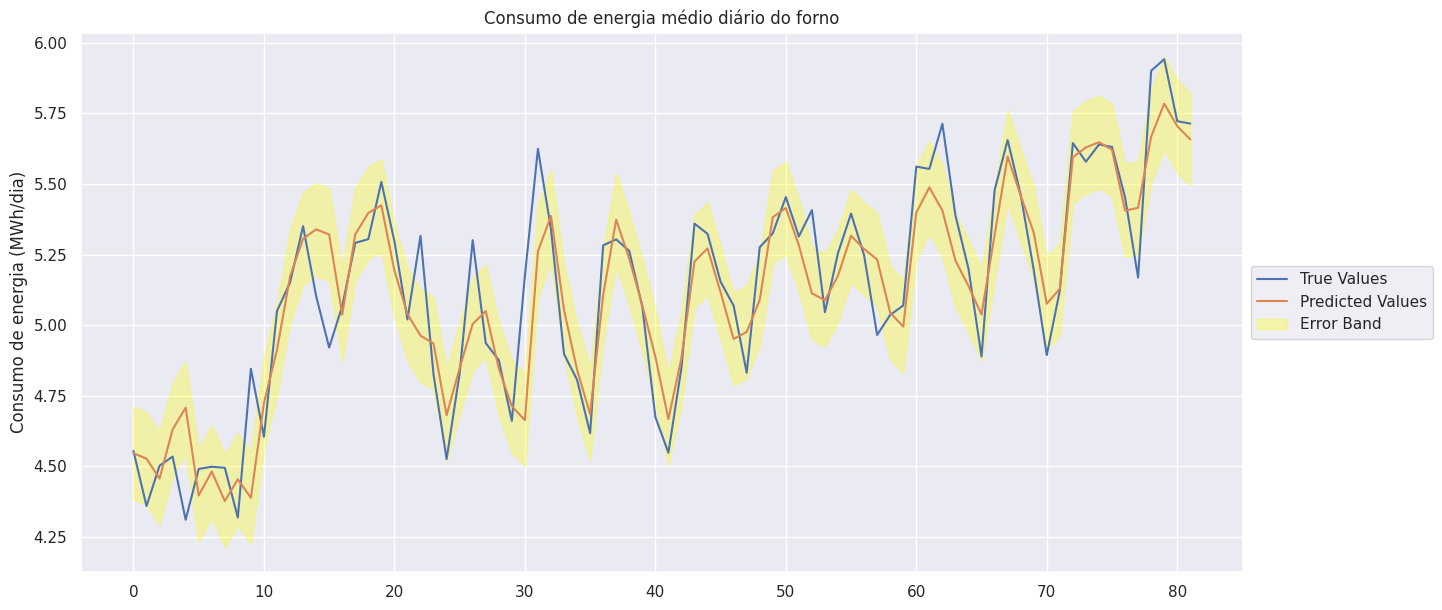

In [7]:
model_utils.plot_predictions(y_test, y_pred, model_name+'__'+model_date)